<a href="https://colab.research.google.com/github/avishekiitism/Covid19/blob/main/nlp_predicting_sentiment_of_covid_19_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

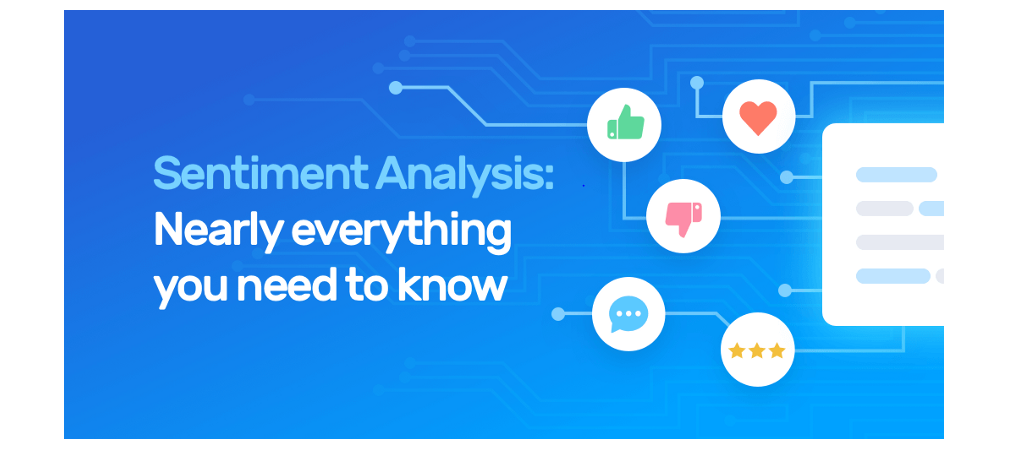

COVID-19 originally known as Corona VIrus Disease of 2019, has been declared as a pandemic by World Health Organization (WHO) on 11th March 2020. Unprecedented pressures have mounted on each country to make compelling requisites for controlling the population by assessing the cases and properly utilizing available resources. The rapid number of exponential cases globally has become the apprehension of panic, fear and anxiety among people. The mental and physical health of the global population is found to be directly proportional to this pandemic disease. It is the need of the hour to implement different measures to safeguard the countries by demystifying the pertinent facts and information.

# Workflow

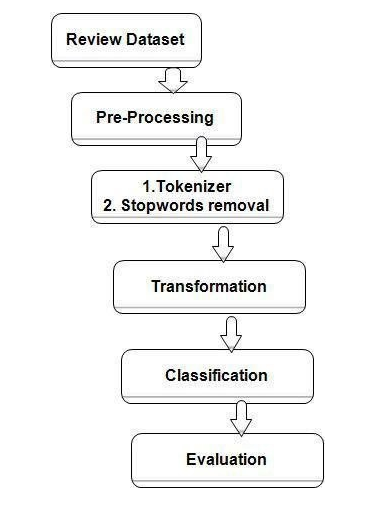

# **1.Lets Invite Some Libraries.**

In [1]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import string
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
#from gensim.models.doc2vec import LabeledSentence
import gensim
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [120]:
df = pd.read_csv('/content/sample_data/Corona_NLP_test.csv',encoding = 'latin-1')

# **2. Reviewing Our Dataset**

In [121]:
df.head()

UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   

                                                                                                                                                                                             OriginalTweet  \
0  TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr...   
1        When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY   
2                                                                                                                                Find out how you can protect yourself and loved ones from #coronavirus. ?   
3  #Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg ...   
4  #toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News  #Corvid19 #7NewsMelb #dunnypapergate #Costco    One week everyone buying baby milk powder the next ...   

            Sentiment  
0  Extremely Negative  
1            Positive  
2  Extremely Positive  
3            Negative  
4             Neutral

In [4]:
# There are null values in location column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [5]:
# There 41157 rows and 6 columns in our database
df.shape

(3798, 6)

In [6]:
# Names Of columns in our dataset
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [7]:
# All tweets came only from March and April month of 2020.
df.TweetAt.value_counts()

13-03-2020    1233
12-03-2020     685
14-03-2020     614
15-03-2020     519
16-03-2020     472
11-03-2020     165
10-03-2020      54
09-03-2020      16
08-03-2020       9
04-03-2020       8
07-03-2020       7
05-03-2020       6
02-03-2020       4
03-03-2020       4
06-03-2020       2
Name: TweetAt, dtype: int64

In [8]:
# There are 12220 unique locations from where the tweets came.
df['Location'].value_counts()

United States               75
London, England             48
Washington, DC              38
New York, NY                34
Los Angeles, CA             33
                            ..
India, Belgium.              1
Boston, MontrÃ©al, Paris     1
Annapolis, MD                1
here and there               1
Haverford, PA                1
Name: Location, Length: 1717, dtype: int64

In [9]:
# There are 5 unique sentiment types in our dataset
df['Sentiment'].value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

# Going deeper into tweet and sentiment.

In [10]:
df[df['Sentiment']=='Extremely Negative']

UserName  ScreenName             Location     TweetAt  \
0            1       44953                  NYC  02-03-2020   
8            9       44961                  NaN  04-03-2020   
11          12       44964            New Delhi  04-03-2020   
12          13       44965              USA, PA  04-03-2020   
15          16       44968           Bengaluru   04-03-2020   
...        ...         ...                  ...         ...   
3766      3767       48719                  NaN  16-03-2020   
3775      3776       48728       Southern Maine  16-03-2020   
3787      3788       48740  Manchester, England  16-03-2020   
3791      3792       48744      Washington D.C.  16-03-2020   
3796      3797       48749                  NaN  16-03-2020   

                                                                                                                                                                                                OriginalTweet  \
0     TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr...   
8     HI TWITTER! I am a pharmacist. I sell hand sanitizer for a living! Or I do when any exists. Like masks, it is sold the fuck out everywhere. SHOULD YOU BE WORRIED? No. Use soap. SHOULD YOU VISIT TW...   
11    Beware of counterfeits trying to sell fake masks at cheap prices. Let's defeat coronavirus threat, #Covid_19 collectively. #BeSafe #BeACascader #CoronavirusReachesDelhi \r\r\n#coronavirusindia \r\...   
12    Panic food buying in Germany due to #coronavirus has begun.  But the #organic is left behind! #Hamsterkauf\r\r\n\r\r\nPanic buying is called "Hamster purchases"(HamsterkÃ¤ufe) in German, taken fro...   
15    #AirSewa \r\r\n\r\r\n@flyspicejet is not providing #webchecin customers free seats.\r\r\n\r\r\nPassengers are forced to choose paid seats as free seats are made available only at airport counter. ...   
...                                                                                                                                                                                                       ...   
3766  My 78 year old dad went to the supermarket today...he just said\r\r\n\r\r\n'i always put some items in the food bank but there wasn't anything left on the shelves to do it'\r\r\n\r\r\nWhat a contr...   
3775  At the store today, cat food was in low supply. Two thoughts:\r\r\n-People must have panicked when #QuarantineCats started trending \r\r\n-Despite bare shelves, people, donÂt resort to cat food! ...   
3787  Its funny seeing all these people fight and panic over food, the same people who discriminated over muslim refugees fleeing their war torn countries. THE AUDACITY. Wash your Ass Karen.            ...   
3791  With Gov Hogan's announcement that all bars, restaurants &amp; gyms to close today, tens of thousands of people are out of work, and will now fall dramatically behind on their bills. Without an IM...   
3796                           Gov need to do somethings instead of biar je rakyat assume 'lockdown' ke or even worst. Harini semua supermarket crowded like hell. Lagi mudah virus tu tersebar ?? #COVID2019   

               Sentiment  
0     Extremely Negative  
8     Extremely Negative  
11    Extremely Negative  
12    Extremely Negative  
15    Extremely Negative  
...                  ...  
3766  Extremely Negative  
3775  Extremely Negative  
3787  Extremely Negative  
3791  Extremely Negative  
3796  Extremely Negative  

[592 rows x 6 columns]

In [11]:
df[df['Sentiment']=='Negative']

UserName  ScreenName             Location     TweetAt  \
3            4       44956          Chicagoland  02-03-2020   
20          21       44973                Malta  05-03-2020   
26          27       44979  Bondi Beach, Sydney  07-03-2020   
27          28       44980                  NaN  07-03-2020   
28          29       44981                  NaN  07-03-2020   
...        ...         ...                  ...         ...   
3770      3771       48723   West Virginia, USA  16-03-2020   
3771      3772       48724          Houston, TX  16-03-2020   
3783      3784       48736                Texas  16-03-2020   
3792      3793       48745      Washington D.C.  16-03-2020   
3794      3795       48747       Farmington, NM  16-03-2020   

                                                                                                                                                                                                OriginalTweet  \
3     #Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg ...   
20    #CoronaVirus #COVID_19 People are starting to become frightened and to do #PanicShopping. Many shelves, meanwhile, turn empty as #goods are sold. #FaceMasks &amp; disinfection liquid are sold out,...   
26    When your usual grocery shopping @woolworths turns into a toilet paper fight in the supermarket aisle. Yikes. #toiletpaperpanic for the #coronavirus has taken a whole new level. https://t.co/aKJ28...   
27    Coronavirus panic spreads: Costco is pulling free samples over COVID-19 - USA TODAY\r\r\n\r\r\nCoronavirus panic spreads: Costco is pulling free samples over COVID-19Â Â USA TODAY\r\r\n\r\r\n'It's...   
28    While you are stocking up, waiting for quarantine, if you can don't forget to donate  food, water, and toiletries to your local food banks to help others without the means to stock up. Get ahead o...   
...                                                                                                                                                                                                       ...   
3770  PSA: Stop panicking about COVID-19, you don't need to shelter yourselves from the outside world and stock up on toilet paper and food enough to stuff Old Faithful 10x over. If you want to go out a...   
3771  When I'm stopped by George at the grocery store - Should I cough on you George.. #coronapocolypse #coronavirus #StayTheFHome #COVID?19 #COVID2019 #COVID19 #CoronaVirusUpdates #CoronavirusOutbreak ...   
3783                                                                    Amazon delivery infrastructure strained as COVID-19 outbreak sparks surge in online shopping Â GeekWire\r\r\nhttps://t.co/UCcEiOY6qK   
3792  @RicePolitics @MDCounties Craig, will you call on the General Assembly to enact a legal stay against debt collection activities now that thousands of Marylanders are without a paycheck? \r\r\n\r\r...   
3794  Did you panic buy a lot of non-perishable items? ECHO needs food donations. It is also looking for volunteers to pack boxes. Volunteers will be screened to be sure they don't have COVID-19. https:...   

     Sentiment  
3     Negative  
20    Negative  
26    Negative  
27    Negative  
28    Negative  
...        ...  
3770  Negative  
3771  Negative  
3783  Negative  
3792  Negative  
3794  Negative  

[1041 rows x 6 columns]

In [12]:
df[df['Sentiment']=='Neutral']

UserName  ScreenName                      Location     TweetAt  \
4            5       44957           Melbourne, Victoria  03-03-2020   
5            6       44958                   Los Angeles  03-03-2020   
7            8       44960           Geneva, Switzerland  03-03-2020   
17          18       44970              Toronto, Ontario  05-03-2020   
34          35       44987        Angmering, West Sussex  08-03-2020   
...        ...         ...                           ...         ...   
3774      3775       48727  Living takes my breath away?  16-03-2020   
3777      3778       48730                           NaN  16-03-2020   
3778      3779       48731                           NaN  16-03-2020   
3788      3789       48741                      Pakistan  16-03-2020   
3795      3796       48748                 Haverford, PA  16-03-2020   

                                                                                                                                                                                                OriginalTweet  \
4     #toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News  #Corvid19 #7NewsMelb #dunnypapergate #Costco    One week everyone buying baby milk powder the next ...   
5     Do you remember the last time you paid $2.99 a gallon for regular gas in Los Angeles?Prices at the pump are going down. A look at how the #coronavirus is impacting prices. 4pm @ABC7 https://t.co/P...   
7     @DrTedros "We canÂt stop #COVID19 without protecting #healthworkers.\r\r\nPrices of surgical masks have increased six-fold, N95 respirators have more than trebled &amp; gowns cost twice as much"-...   
17              When youÂre stockpiling food &amp; other supplies, buy extra for your local food bank. Many families donÂt have the luxury to spend beyond their weekly budget. @DailyBreadTO  #coronavirus   
34                                                       So not due to #Brexit at all then &gt;&gt; Supermarkets begin #foodrationing after wave of #coronavirus-fuelled panic buying https://t.co/AKgkHxO0tW   
...                                                                                                                                                                                                       ...   
3774                                                          The financial &amp; economic impact of COVID-19 closures and cancellations will effect every consumer and taxpayer in every state. #coronavirus   
3777                                                                                                       Waiting in a line in 1 meter distance from each other to be let into the supermarket one at a time   
3778  In light of the ongoing and rapidly evolving Covid 19 pandemic we have made the decision to immediately close our brewery tap room Our brewery retail store will remain open regular hours and our o...   
3788                                                              You never eaten the pigs cat dog or food from international fast food chains and always taken Halal food then you are save from Don t panic   
3795                Asst Prof of Economics @cconces was on @NBCPhiladelphia talking about her recent research on coronavirus' impact on the economy. Watch it here (starting at :33): https://t.co/8tfYNoro5l   

     Sentiment  
4      Neutral  
5      Neutral  
7      Neutral  
17     Neutral  
34     Neutral  
...        ...  
3774   Neutral  
3777   Neutral  
3778   Neutral  
3788   Neutral  
3795   Neutral  

[619 rows x 6 columns]

In [13]:
df[df['Sentiment']=='Positive']

UserName  ScreenName                Location     TweetAt  \
1            2       44954             Seattle, WA  02-03-2020   
6            7       44959                     NaN  03-03-2020   
10          11       44963  Boksburg, South Africa  04-03-2020   
14          15       44967          Washington, DC  04-03-2020   
18          19       44971                     NaN  05-03-2020   
...        ...         ...                     ...         ...   
3779      3780       48732                     NaN  16-03-2020   
3780      3781       48733             Kansas, USA  16-03-2020   
3784      3785       48737       Paraparaumu Beach  16-03-2020   
3790      3791       48743        Cincinnati, Ohio  16-03-2020   
3793      3794       48746               Israel ??  16-03-2020   

                                                                                                                                                                                                OriginalTweet  \
1           When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY   
6                                                                                                                  Voting in the age of #coronavirus = hand sanitizer ? #SuperTuesday https://t.co/z0BeL4O6Dk   
10    Best quality couches at unbelievably low prices available to order.\r\r\n\r\r\nWe are in Boksburg GP \r\r\n\r\r\nFor more info WhatsApp:\r\r\n084 764 8086\r\r\n\r\r\n#SuperTuesdsy #PowerTalk \r\r\...   
14      While we were busy watching election returns and bracing for a Covid-19 outbreak, Trump nominated a chemical-industry lobbyist to head the Consumer Product Safety Commission https://t.co/M2ShHI1Tn0   
18    That's about a week from now. A bit optimistic.  Probably it will take another month.  Supply chain may be recovering, demand chain will be non-existent in US and Europe for the next month or two....   
...                                                                                                                                                                                                       ...   
3779  Stuck inside?  How about getting some reading in to fill the time, and your mind?  For the #coronavirus #COVID?19 time, I've lowered all ebook prices to $0.99.  Comedy, drama, action, philosophy, ...   
3780  @GovLauraKelly PLEASE CLOSE ALL RETAIL that is not a pharmacy or a grocery store. People in Wyandotte County are not heading the warnings to STAY HOME. People like me (asthmatic) can't risk going ...   
3784  Just been through K?piti New World which is busy. Staff say it's been that way since the COVID-19 case in Wellington hit the news. Still food on the shelves - a few gaps like long life milk appear...   
3790  Even though the Law Library is closed, ALL subscribers can access ebooks, EBSCO Legal forms, the National Consumer Law Center and research assistance remotely. Click here to find out more:\r\r\n\r...   
3793                                                                          Meanwhile In A Supermarket in Israel -- People dance and sing together to stay positive. ? #CoronaVirus https://t.co/VLLqGI3R16   

     Sentiment  
1     Positive  
6     Positive  
10    Positive  
14    Positive  
18    Positive  
...        ...  
3779  Positive  
3780  Positive  
3784  Positive  
3790  Positive  
3793  Positive  

[947 rows x 6 columns]

In [14]:
df[df['Sentiment']=='Extremely Positive']

UserName  ScreenName                    Location     TweetAt  \
2            3       44955                         NaN  02-03-2020   
9           10       44962             Dublin, Ireland  04-03-2020   
13          14       44966                         NaN  04-03-2020   
16          17       44969                      Mumbai  05-03-2020   
19          20       44972                 Tallahassee  05-03-2020   
...        ...         ...                         ...         ...   
3782      3783       48735                     Toronto  16-03-2020   
3785      3786       48738  People's Republic of China  16-03-2020   
3786      3787       48739      Flemington, New Jersey  16-03-2020   
3789      3790       48742             California, USA  16-03-2020   
3797      3798       48750         Arlington, Virginia  16-03-2020   

                                                                                                                                                                                                OriginalTweet  \
2                                                                                                                                   Find out how you can protect yourself and loved ones from #coronavirus. ?   
9     Anyone been in a supermarket over the last few days? Went to do my NORMAL shop last night &amp; ??is the sight that greeted me. Barmy! (Btw, whatÂs so special about tinned tomatoes? ????????????)...   
13    #Covid_19 Went to the Grocery Store, turns out all cleaning supplies have been bought out for fear of Coronavirus.\r\r\n\r\r\nMy daughter's substitute teacher showed her class how to make hand san...   
16    What Precautionary measures have you all taken in your respective Restaurants and Hotels, Comment below...\r\r\n#COVID-19 #Coronavirus\r\r\n\r\r\nCOVID-19: Hotel chains enforce precautionary measu...   
19    Studies show the #coronavirus like #COVID19 can live up to nine days on hard surfaces like metal, plastic, and glass.\r\r\n\r\r\nOur Deputy Commissioner of Consumer Affairs Mary Barzee Flores show...   
...                                                                                                                                                                                                       ...   
3782  Most brands feel compelled to address COVID-19 in their consumer-facing messaging. Not all of them are doing a great job...\r\r\n\r\r\n#COVID19 #digitalmarketing #digitaladvertising\r\r\n\r\r\nhtt...   
3785  At this crucial time when non Muslims are giving charities of #Medics, We so called great #PakistaniMuslims have raised the prices of #Masks and #sanitizer to 200%. Thanks to such great #Muslims #...   
3786  We've noticed a shift in consumer #research in response to #COVID19 #CoronaVirus &amp; we have some thoughts we'd love to share on: the current state of research in the COVID-19 environment, what ...   
3789  @calebmealer @thebradfordfile @realDonaldTrump Very true. China has done a great job. Of more than 80,000 people infected in China, over 67,000 have recovered according to data compiled by Johns H...   
3797  I and @ForestandPaper members are committed to the safety of our employees and our end-users. We are monitoring COVID-19. Rest assured that tissue manufacturers are continuing to produce and ship ...   

               Sentiment  
2     Extremely Positive  
9     Extremely Positive  
13    Extremely Positive  
16    Extremely Positive  
19    Extremely Positive  
...                  ...  
3782  Extremely Positive  
3785  Extremely Positive  
3786  Extremely Positive  
3789  Extremely Positive  
3797  Extremely Positive  

[599 rows x 6 columns]

In [15]:
pd.isnull(df["Sentiment"])


0       False
1       False
2       False
3       False
4       False
        ...  
3793    False
3794    False
3795    False
3796    False
3797    False
Name: Sentiment, Length: 3798, dtype: bool

# Looking For Null Values

Only Location column contains 28% null values. But this column is not useful for our sentiment analysis.Hence we will neglect these null values.

In [16]:
missing_values = pd.DataFrame()
missing_values['column'] = df.columns

missing_values['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]
missing_values = missing_values.sort_values('percent')
missing_values = missing_values[missing_values['percent']>0]

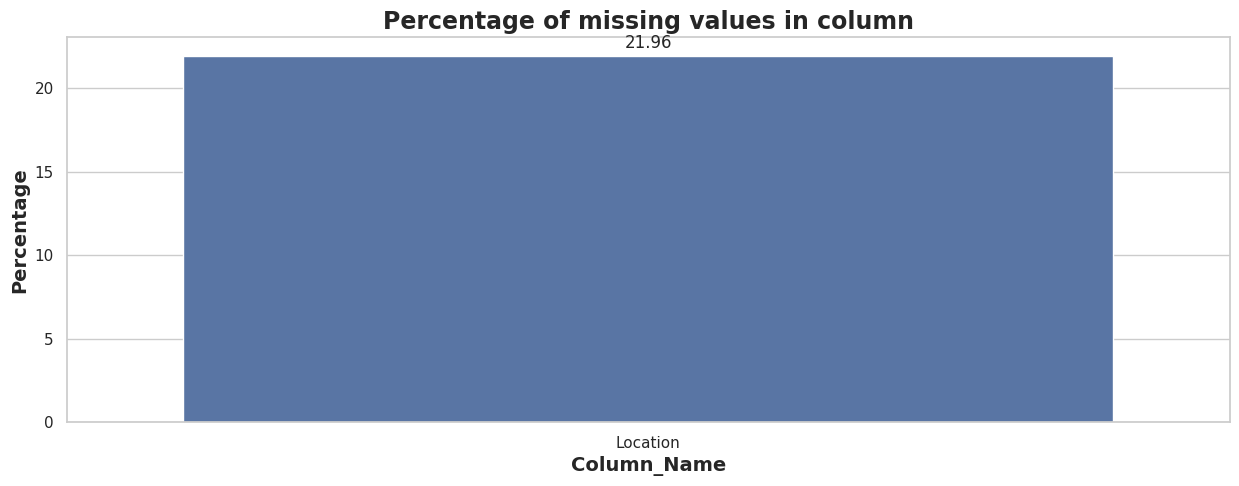

In [17]:
plt.figure(figsize=(15, 5))
sns.set(style='whitegrid', color_codes=True)
splot=sns.barplot(x='column', y='percent', data=missing_values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.ylabel("Percentage", size=14, weight="bold")
plt.title("Percentage of missing values in column",fontweight="bold",size=17)
plt.show()


# Heat Map for missing values

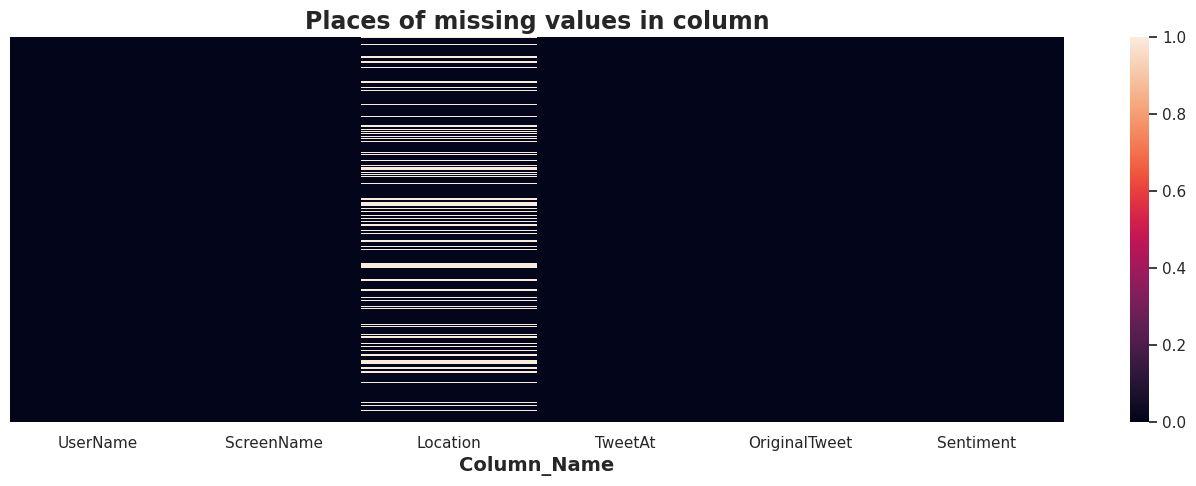

In [18]:
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

# Unique Values In Each Feature Coulmn

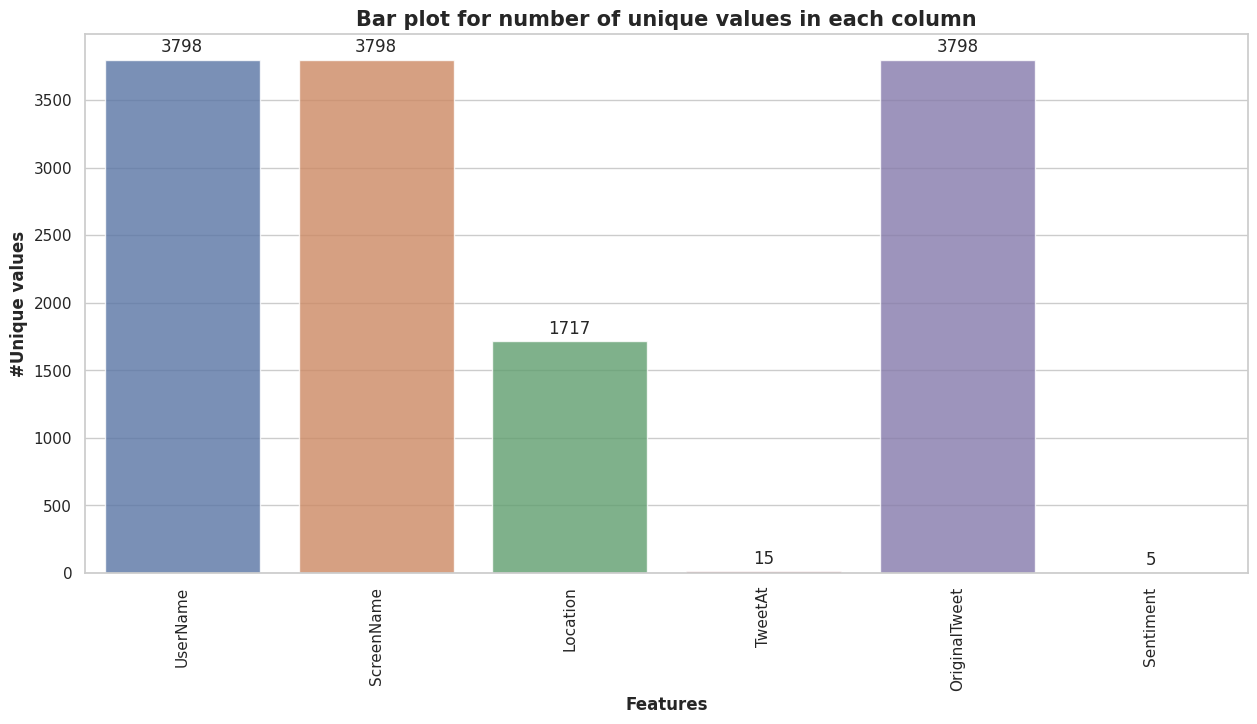

In [19]:
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

# Plot Of Top 15 Locations Of Tweet.

In [20]:
loc_analysis = pd.DataFrame(df['Location'].value_counts().sort_values(ascending=False))
loc_analysis = loc_analysis.rename(columns={'Location':'count'})

In [21]:
import plotly.graph_objects as go


In [22]:
data = {
   "values": loc_analysis['count'][:15],
   "labels": loc_analysis.index[:15],
   "domain": {"column": 0},
   "name": "Location Name",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Ratio on Location</b>", legend=dict(x=0.1, y=1.1, orientation="h"))

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()

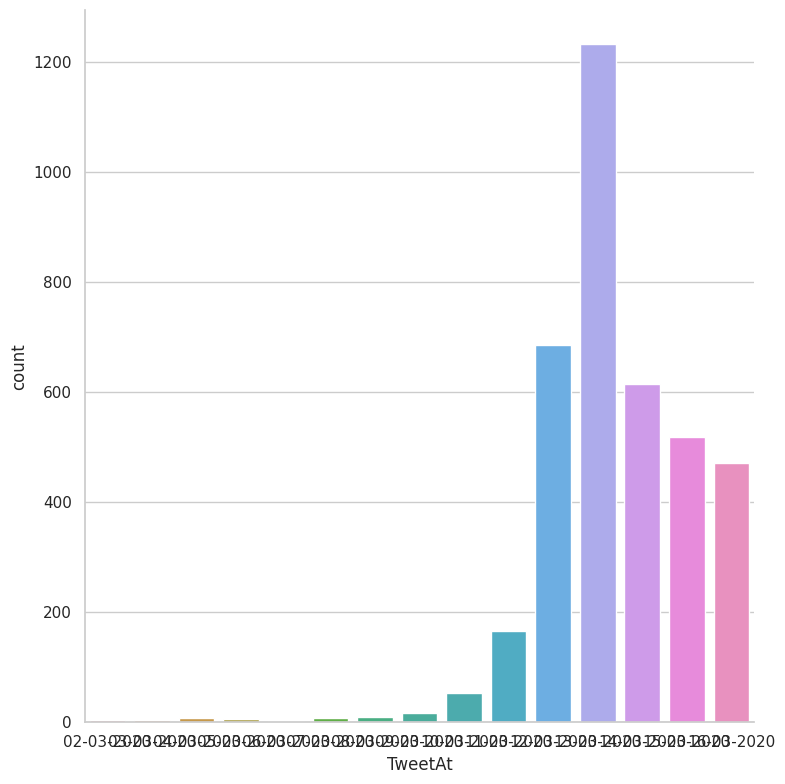

In [23]:
sns.catplot( data=df,x="TweetAt", kind="count", height=8)

# Top 10 locations of tweet

In [24]:
Top_Location_Of_tweet= df['Location'].value_counts().head(10)

sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')

In [25]:
Top_Location_Of_tweet.head(10)

United States       75
London, England     48
Washington, DC      38
New York, NY        34
Los Angeles, CA     33
Toronto, Ontario    29
Canada              29
California, USA     26
London              25
Toronto             21
Name: Location, dtype: int64

In [26]:
Top_Location_Of_tweet_df=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet_df.reset_index(inplace=True)
Top_Location_Of_tweet_df.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet_df

Location  Location_Count
0     United States              75
1   London, England              48
2    Washington, DC              38
3      New York, NY              34
4   Los Angeles, CA              33
5  Toronto, Ontario              29
6            Canada              29
7   California, USA              26
8            London              25
9           Toronto              21

[Text(0, 0, 'United States'),
 Text(1, 0, 'London, England'),
 Text(2, 0, 'Washington, DC'),
 Text(3, 0, 'New York, NY'),
 Text(4, 0, 'Los Angeles, CA'),
 Text(5, 0, 'Toronto, Ontario'),
 Text(6, 0, 'Canada'),
 Text(7, 0, 'California, USA'),
 Text(8, 0, 'London'),
 Text(9, 0, 'Toronto')]

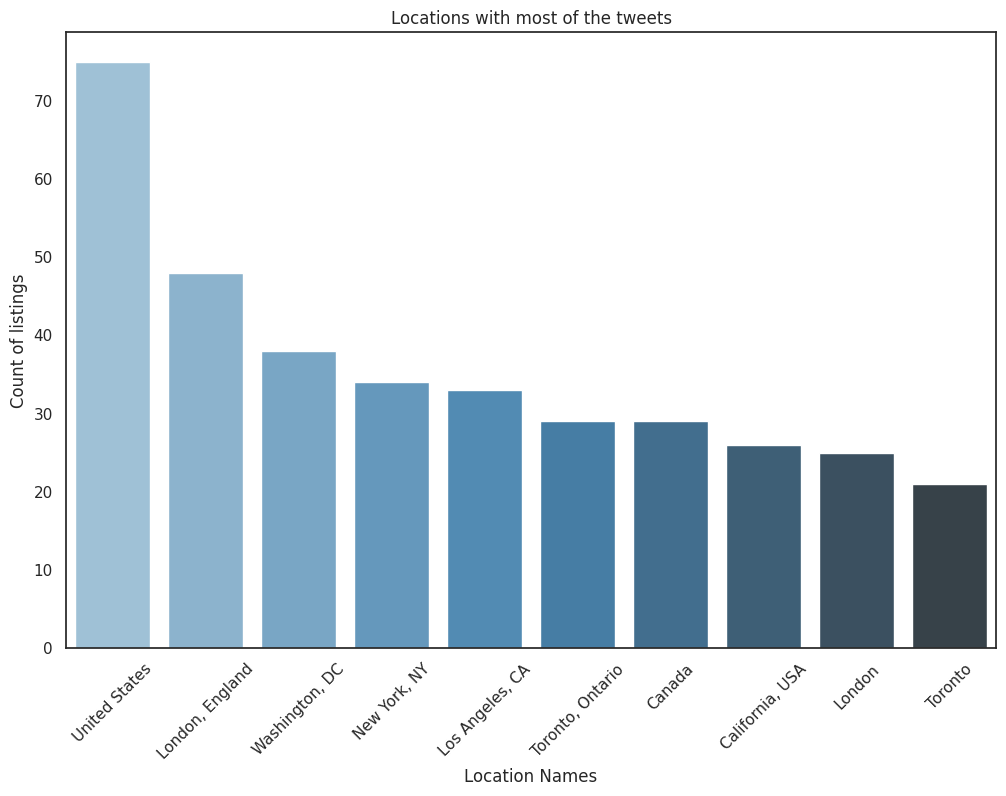

In [27]:
viz_1=sns.barplot(x="Location", y="Location_Count", data=Top_Location_Of_tweet_df,
                 palette='Blues_d')
viz_1.set_title('Locations with most of the tweets')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Location Names')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

# Sentiments Countplot

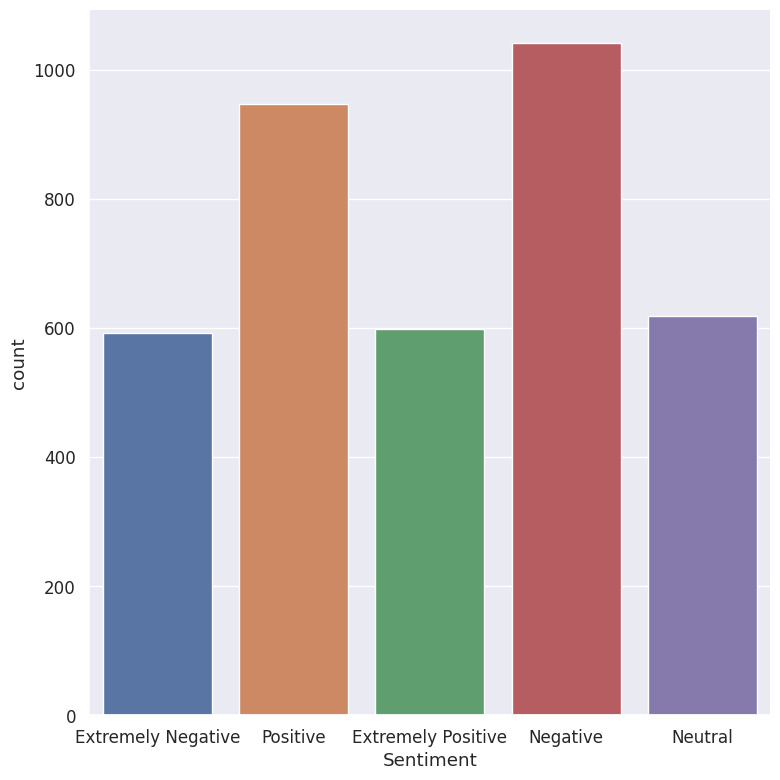

In [28]:
sns.set(font_scale=1.1)
sns.catplot(x="Sentiment", data=df, kind="count", height=8)

In [29]:
df.TweetAt.value_counts()

13-03-2020    1233
12-03-2020     685
14-03-2020     614
15-03-2020     519
16-03-2020     472
11-03-2020     165
10-03-2020      54
09-03-2020      16
08-03-2020       9
04-03-2020       8
07-03-2020       7
05-03-2020       6
02-03-2020       4
03-03-2020       4
06-03-2020       2
Name: TweetAt, dtype: int64

# Data Preprocessing

**A) Removing @user**

In [122]:
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [123]:
# create new column with removed @user
df['Tweet'] = np.vectorize(remove_pattern)(df['OriginalTweet'], '@[\w]*')

In [124]:
df.head(2)

UserName  ScreenName     Location     TweetAt  \
0         1       44953          NYC  02-03-2020   
1         2       44954  Seattle, WA  02-03-2020   

                                                                                                                                                                                             OriginalTweet  \
0  TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr...   
1        When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY   

            Sentiment  \
0  Extremely Negative   
1            Positive   

                                                                                                                                                                                                     Tweet  
0  TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr...  
1        When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY

**REMOVED HTTP AND URLS FROM TWEET**

In [125]:
import re
df['Tweet'] = df['Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [126]:
df.head(3)

UserName  ScreenName     Location     TweetAt  \
0         1       44953          NYC  02-03-2020   
1         2       44954  Seattle, WA  02-03-2020   
2         3       44955          NaN  02-03-2020   

                                                                                                                                                                                             OriginalTweet  \
0  TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr...   
1        When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY   
2                                                                                                                                Find out how you can protect yourself and loved ones from #coronavirus. ?   

            Sentiment  \
0  Extremely Negative   
1            Positive   
2  Extremely Positive   

                                                                                                                                                                                   Tweet  
0  TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up   
1             When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices.   
2                                                                                                              Find out how you can protect yourself and loved ones from #coronavirus. ?

**B) Removing Punctuations, Numbers, and Special Characters**

In [130]:
# remove special characters, numbers, punctuations
df['Tweet'] = df['Tweet'].str.lower()
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["Tweet"] = df["Tweet"].apply(lambda text: remove_punctuation(text))

In [131]:
df.head(5)

UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   

                                                                                                                                                                                             OriginalTweet  \
0  TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr...   
1        When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY   
2                                                                                                                                Find out how you can protect yourself and loved ones from #coronavirus. ?   
3  #Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg ...   
4  #toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News  #Corvid19 #7NewsMelb #dunnypapergate #Costco    One week everyone buying baby milk powder the next ...   

            Sentiment  \
0  Extremely Negative   
1            Positive   
2  Extremely Positive   
3            Negative   
4             Neutral   

                                                                                                                                                                                                     Tweet  
0                               trending new yorkers encounter empty supermarket shelves pictured wegmans in brooklyn soldout online grocers foodkick maxdelivery as coronavirusfearing shoppers stock up   
1                                           when i couldnt find hand sanitizer at fred meyer i turned to amazon but 11497 for a 2 pack of purellcheck out how  coronavirus concerns are driving up prices   
2                                                                                                                                   find out how you can protect yourself and loved ones from coronavirus   
3  panic buying hits newyork city as anxious shoppers stock up on foodampmedical supplies after healthcare worker in her 30s becomes bigapple 1st confirmed coronavirus patient or a bloomberg staged e...  
4  toiletpaper dunnypaper coronavirus coronavirusaustralia coronavirusupdate covid19 9news  corvid19 7newsmelb dunnypapergate costco    one week everyone buying baby milk powder the next everyone buy...

**C) Removing Stop Words**

In [132]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [133]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')

In [134]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["Tweet"] = df["Tweet"].apply(lambda text: remove_stopwords(text))

In [135]:
df.head(2)

UserName  ScreenName     Location     TweetAt  \
0         1       44953          NYC  02-03-2020   
1         2       44954  Seattle, WA  02-03-2020   

                                                                                                                                                                                             OriginalTweet  \
0  TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr...   
1        When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY   

            Sentiment  \
0  Extremely Negative   
1            Positive   

                                                                                                                                                              Tweet  
0  trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn soldout online grocers foodkick maxdelivery coronavirusfearing shoppers stock  
1                                                 couldnt find hand sanitizer fred meyer turned amazon 11497 2 pack purellcheck coronavirus concerns driving prices

**D) Tokenization**

In [136]:
# create new variable tokenized tweet
tokenized_tweet = df['Tweet'].apply(lambda x: x.split())

In [137]:
df.head(2)

UserName  ScreenName     Location     TweetAt  \
0         1       44953          NYC  02-03-2020   
1         2       44954  Seattle, WA  02-03-2020   

                                                                                                                                                                                             OriginalTweet  \
0  TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr...   
1        When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY   

            Sentiment  \
0  Extremely Negative   
1            Positive   

                                                                                                                                                              Tweet  
0  trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn soldout online grocers foodkick maxdelivery coronavirusfearing shoppers stock  
1                                                 couldnt find hand sanitizer fred meyer turned amazon 11497 2 pack purellcheck coronavirus concerns driving prices

**E) Lemmatizer**

In [138]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["Tweet"] = df["Tweet"].apply(lambda text: lemmatize_words(text))


In [139]:
df.head(2)

UserName  ScreenName     Location     TweetAt  \
0         1       44953          NYC  02-03-2020   
1         2       44954  Seattle, WA  02-03-2020   

                                                                                                                                                                                             OriginalTweet  \
0  TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr...   
1        When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY   

            Sentiment  \
0  Extremely Negative   
1            Positive   

                                                                                                                                                          Tweet  
0  trending new yorkers encounter empty supermarket shelf pictured wegmans brooklyn soldout online grocer foodkick maxdelivery coronavirusfearing shopper stock  
1                                               couldnt find hand sanitizer fred meyer turned amazon 11497 2 pack purellcheck coronavirus concern driving price

In [140]:
# join tokens into one sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
# change df['Tweet'] to tokenized_tweet

In [141]:
df['Tweet']  = tokenized_tweet


In [142]:
df.head(2)

UserName  ScreenName     Location     TweetAt  \
0         1       44953          NYC  02-03-2020   
1         2       44954  Seattle, WA  02-03-2020   

                                                                                                                                                                                             OriginalTweet  \
0  TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr...   
1        When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY   

            Sentiment  \
0  Extremely Negative   
1            Positive   

                                                                                                                                                              Tweet  
0  trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn soldout online grocers foodkick maxdelivery coronavirusfearing shoppers stock  
1                                                 couldnt find hand sanitizer fred meyer turned amazon 11497 2 pack purellcheck coronavirus concerns driving prices

# **Story Generation and Visualization from Tweets**

*  What are the most common words in the entire dataset?

*  What are the most common words in the dataset for negative and positive tweets, respectively?

*  How many hashtags are there in a tweet?

*  Which trends are associated with my dataset?

*  Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

A) **Understanding the common words used in the tweets: WordCloud**

In [143]:
df.head(2)

UserName  ScreenName     Location     TweetAt  \
0         1       44953          NYC  02-03-2020   
1         2       44954  Seattle, WA  02-03-2020   

                                                                                                                                                                                             OriginalTweet  \
0  TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr...   
1        When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY   

            Sentiment  \
0  Extremely Negative   
1            Positive   

                                                                                                                                                              Tweet  
0  trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn soldout online grocers foodkick maxdelivery coronavirusfearing shoppers stock  
1                                                 couldnt find hand sanitizer fred meyer turned amazon 11497 2 pack purellcheck coronavirus concerns driving prices

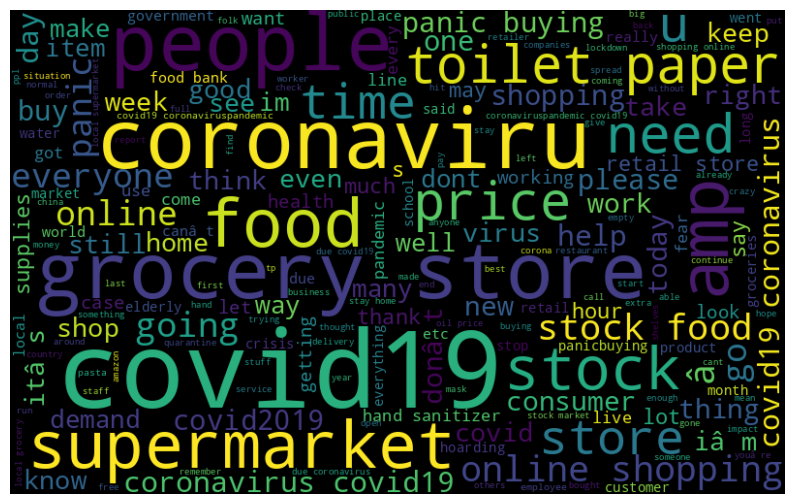

In [144]:
# create text from all tweets
all_words = ' '.join([text for text in df['Tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

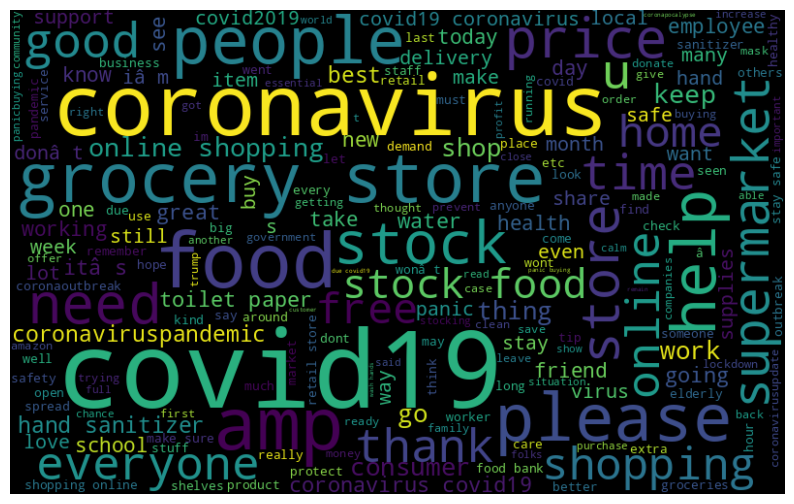

In [145]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Extremely Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

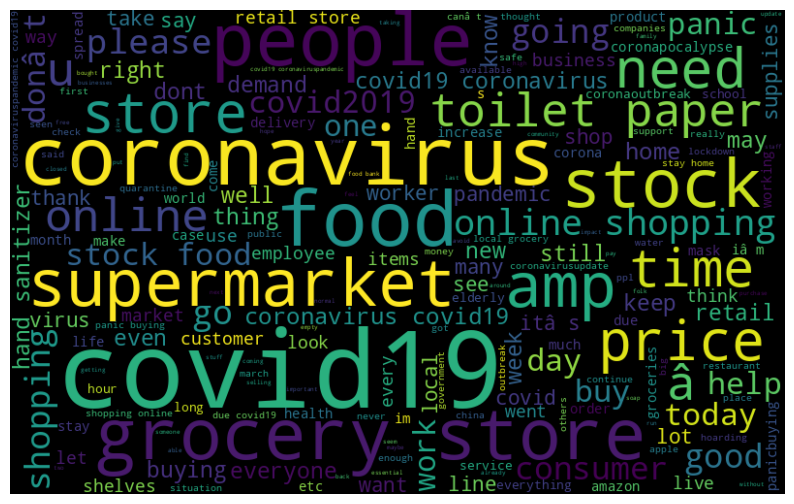

In [146]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

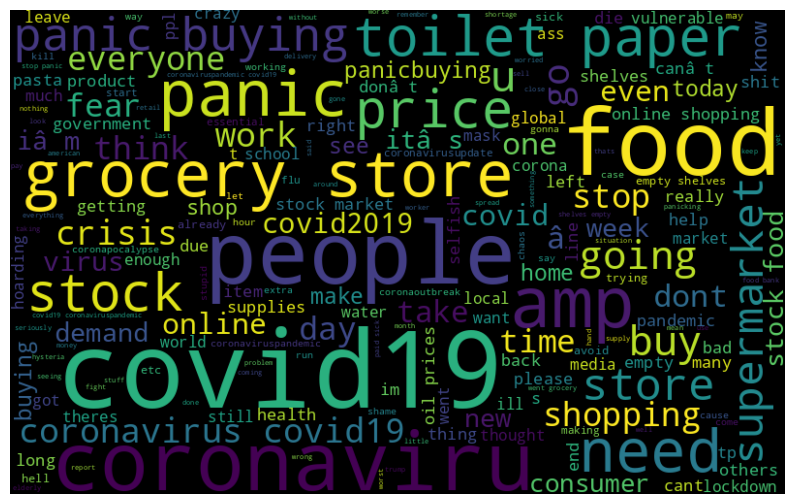

In [147]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Extremely Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

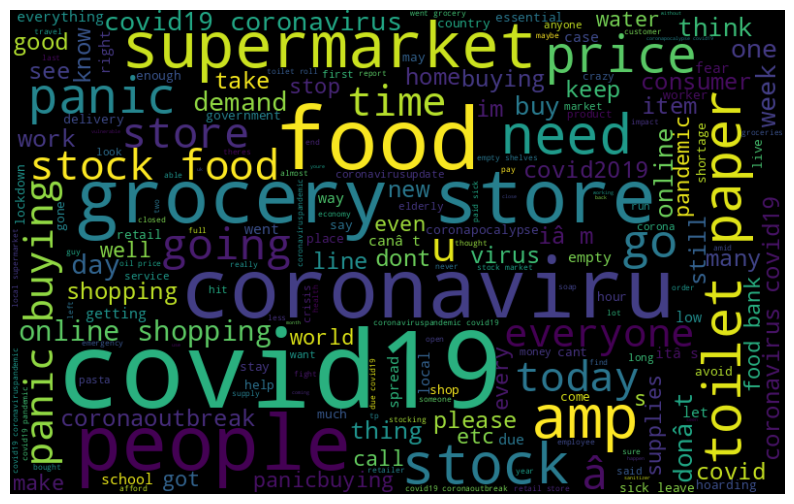

In [148]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

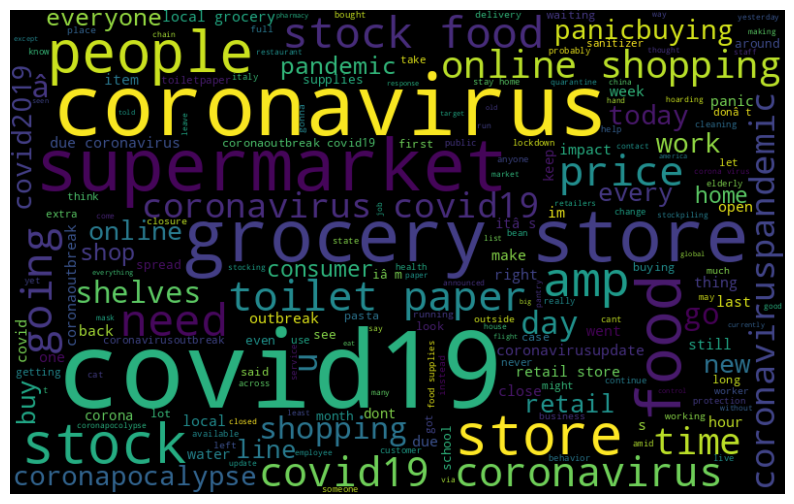

In [149]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**D) Understanding the impact of Hashtags on tweets sentiment**

In [150]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

In [151]:
# extracting hashtags from non racist/sexist tweets
HT_Extremely_Positive = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Extremely Positive'])
HT_Positive = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Positive'])
HT_Neutral = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Neutral'])
HT_Negative = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Negative'])
HT_Extremely_Negative = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Extremely Negative'])



# unnesting list
HT_Extremely_Positive = sum(HT_Extremely_Positive, [])
HT_Positive = sum(HT_Positive, [])
HT_Neutral = sum(HT_Neutral, [])
HT_Negative = sum(HT_Negative,[])
HT_Extremely_Negative = sum(HT_Extremely_Negative,[])

In [152]:
# print(HT_Extremely_Positive)

In [153]:
# print(HT_Positive)

In [154]:
# print(HT_Neutral)

In [155]:
# print(HT_Negative)

In [156]:
# print(HT_Extremely_Negative)

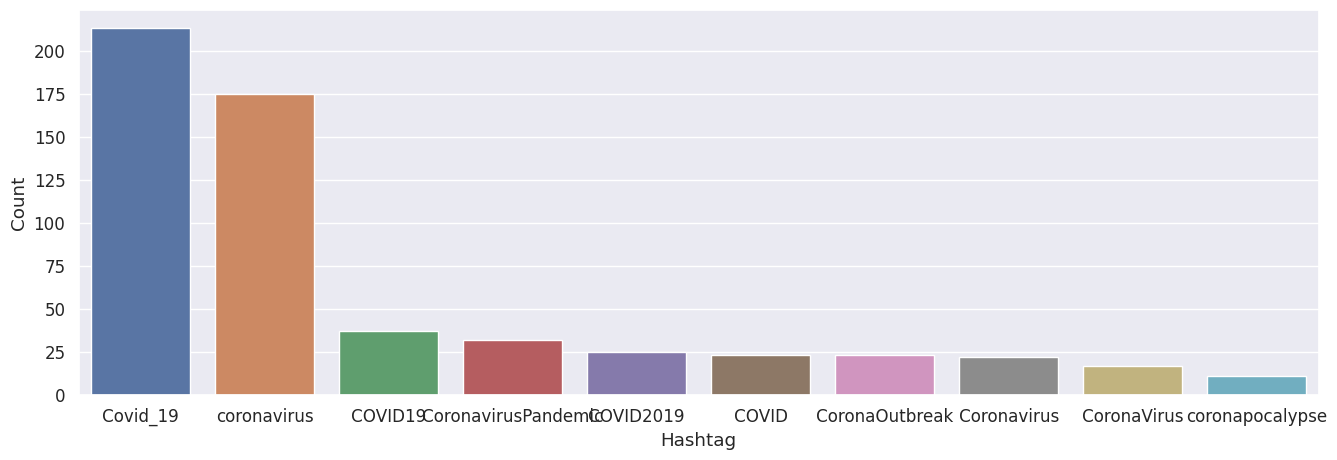

In [157]:
# making frequency distribution top 10 Extremely Positive hashtags
a = nltk.FreqDist(HT_Extremely_Positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

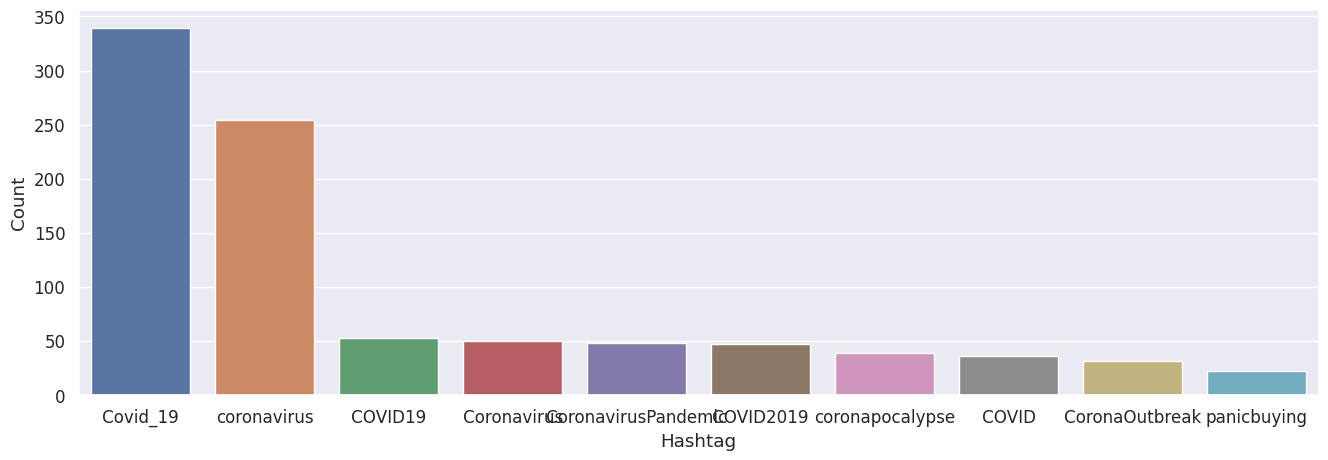

In [158]:
# making frequency distribution top 10 Positive hashtags
a = nltk.FreqDist(HT_Positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

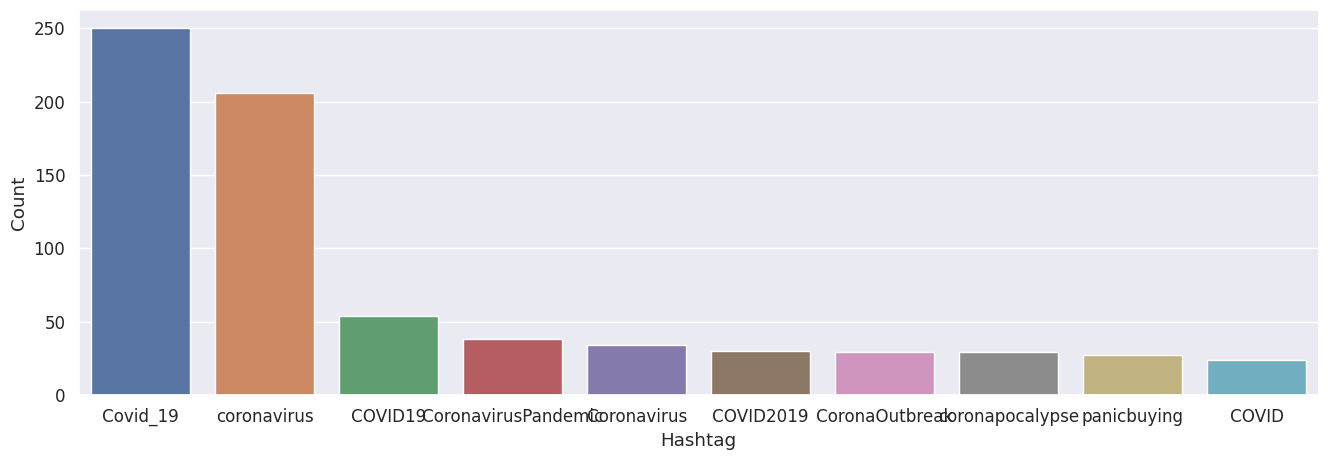

In [159]:
# making frequency distribution top 10 Positive hashtags
a = nltk.FreqDist(HT_Neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

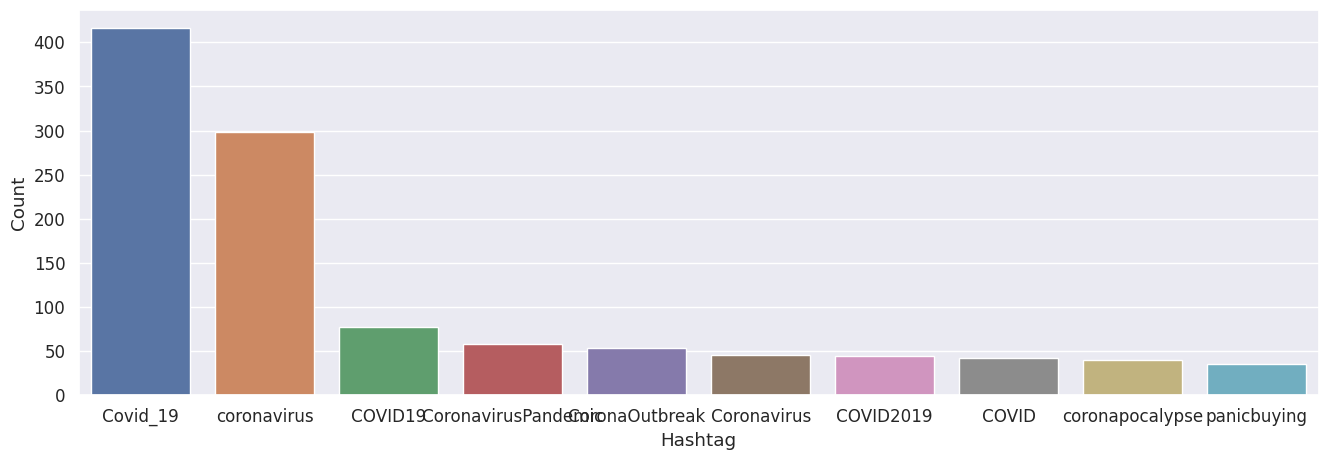

In [160]:
# making frequency distribution top 10 Positive hashtags
a = nltk.FreqDist(HT_Negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

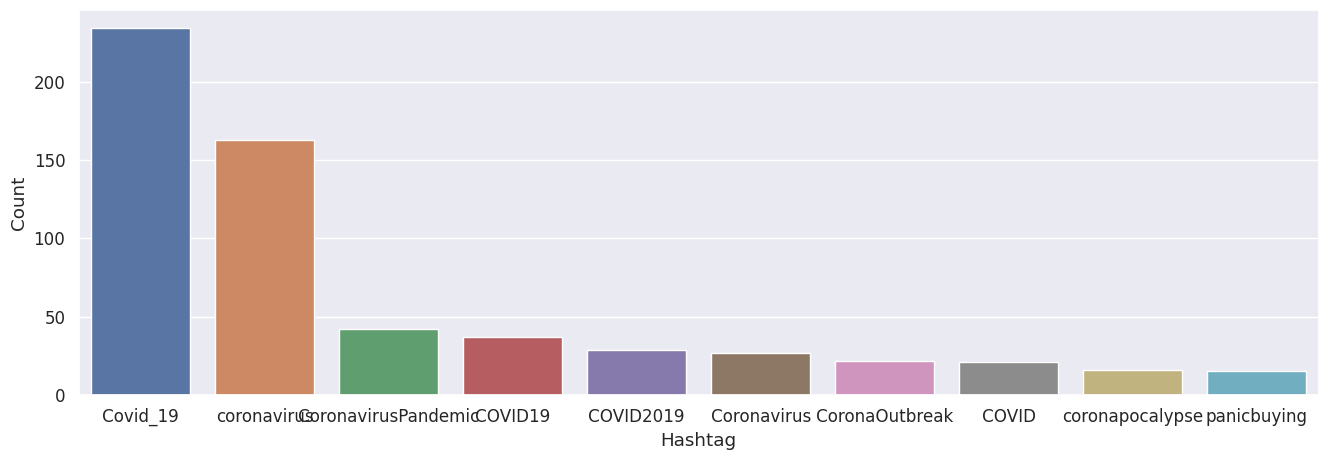

In [161]:
# making frequency distribution top 10 Extremely Negative hashtags
a = nltk.FreqDist(HT_Extremely_Negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

#**4. Extracting Features from Cleaned Tweets**

In [162]:
new_df = df[['Tweet','Sentiment']]

In [163]:
new_df.head()

Tweet  \
0                                         trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn soldout online grocers foodkick maxdelivery coronavirusfearing shoppers stock   
1                                                                                        couldnt find hand sanitizer fred meyer turned amazon 11497 2 pack purellcheck coronavirus concerns driving prices   
2                                                                                                                                                                      find protect loved ones coronavirus   
3                            panic buying hits newyork city anxious shoppers stock foodampmedical supplies healthcare worker 30s becomes bigapple 1st confirmed coronavirus patient bloomberg staged event   
4  toiletpaper dunnypaper coronavirus coronavirusaustralia coronavirusupdate covid19 9news corvid19 7newsmelb dunnypapergate costco one week everyone buying baby milk powder next everyone buying toil...   

            Sentiment  
0  Extremely Negative  
1            Positive  
2  Extremely Positive  
3            Negative  
4             Neutral

In [164]:
df['Sentiment'].value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

**Converting into lower case**

In [165]:
#new_df["Tweet"] = new_df["Tweet"].str.lower()#.str.split()

In [166]:
#new_df.head(5)

**Removing Stopwords**

In [167]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [168]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [169]:
new_df['Tweet'].apply(lambda x: [item for item in x if item not in stop])

0       [r, e, n, n, g,  , n, e, w,  , r, k, e, r,  , e, n, c, u, n, e, r,  , e, p,  , u, p, e, r, r, k, e,  , h, e, l, v, e,  , p, c, u, r, e,  , w, e, g, n,  , b, r, k, l, n,  , l, u,  , n, l, n, e,  , ...
1       [c, u, l, n,  , f, n,  , h, n,  , n, z, e, r,  , f, r, e,  , e, e, r,  , u, r, n, e,  , z, n,  , 1, 1, 4, 9, 7,  , 2,  , p, c, k,  , p, u, r, e, l, l, c, h, e, c, k,  , c, r, n, v, r, u,  , c, n, ...
2                                                                                                                                               [f, n,  , p, r, e, c,  , l, v, e,  , n, e,  , c, r, n, v, r, u]
3       [p, n, c,  , b, u, n, g,  , h,  , n, e, w, r, k,  , c,  , n, x, u,  , h, p, p, e, r,  , c, k,  , f, p, e, c, l,  , u, p, p, l, e,  , h, e, l, h, c, r, e,  , w, r, k, e, r,  , 3, 0,  , b, e, c, e, ...
4       [l, e, p, p, e, r,  , u, n, n, p, p, e, r,  , c, r, n, v, r, u,  , c, r, n, v, r, u, u, r, l,  , c, r, n, v, r, u, u, p, e,  , c, v, 1, 9,  , 9, n, e, w,  , c, 

In [170]:
new_df.head(6)

Tweet  \
0                                         trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn soldout online grocers foodkick maxdelivery coronavirusfearing shoppers stock   
1                                                                                        couldnt find hand sanitizer fred meyer turned amazon 11497 2 pack purellcheck coronavirus concerns driving prices   
2                                                                                                                                                                      find protect loved ones coronavirus   
3                            panic buying hits newyork city anxious shoppers stock foodampmedical supplies healthcare worker 30s becomes bigapple 1st confirmed coronavirus patient bloomberg staged event   
4  toiletpaper dunnypaper coronavirus coronavirusaustralia coronavirusupdate covid19 9news corvid19 7newsmelb dunnypapergate costco one week everyone buying baby milk powder next everyone buying toil...   
5                                                                                        remember last time paid 299 gallon regular gas los angelesprices pump going look coronavirus impacting prices 4pm   

            Sentiment  
0  Extremely Negative  
1            Positive  
2  Extremely Positive  
3            Negative  
4             Neutral  
5             Neutral

In [171]:
new_df.shape

(3798, 2)

In [172]:
new_df.isnull().sum()

Tweet        0
Sentiment    0
dtype: int64

In [173]:
new_df.head(7)

Tweet  \
0                                         trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn soldout online grocers foodkick maxdelivery coronavirusfearing shoppers stock   
1                                                                                        couldnt find hand sanitizer fred meyer turned amazon 11497 2 pack purellcheck coronavirus concerns driving prices   
2                                                                                                                                                                      find protect loved ones coronavirus   
3                            panic buying hits newyork city anxious shoppers stock foodampmedical supplies healthcare worker 30s becomes bigapple 1st confirmed coronavirus patient bloomberg staged event   
4  toiletpaper dunnypaper coronavirus coronavirusaustralia coronavirusupdate covid19 9news corvid19 7newsmelb dunnypapergate costco one week everyone buying baby milk powder next everyone buying toil...   
5                                                                                        remember last time paid 299 gallon regular gas los angelesprices pump going look coronavirus impacting prices 4pm   
6                                                                                                                                                       voting age coronavirus hand sanitizer supertuesday   

            Sentiment  
0  Extremely Negative  
1            Positive  
2  Extremely Positive  
3            Negative  
4             Neutral  
5             Neutral  
6            Positive

# Spitting Our Dataset into Training And Testing Dataset ( For Multiclass Classification)

In [174]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (3038, 2)
valid shape :  (760, 2)


# Use Of Counter Vectorizer For Multi Class Classification

In [175]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_valid = vectorizer.transform(valid.Tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (3038, 10080)
X_train.shape :  (760, 10080)
y_train.shape :  (3038,)
y_valid.shape :  (760,)


# Naive Bayes Classifier for MULTICLASS Classification

In [176]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.8847926267281107
Validation accuracy Score :  0.3828947368421053
                    precision    recall  f1-score   support

Extremely Negative       0.25      0.55      0.34        53
Extremely Positive       0.23      0.48      0.31        56
          Negative       0.63      0.36      0.45       369
           Neutral       0.14      0.59      0.22        29
          Positive       0.46      0.34      0.39       253

          accuracy                           0.38       760
         macro avg       0.34      0.46      0.34       760
      weighted avg       0.50      0.38      0.41       760



# Stochastic Gradient Descent-SGD Classifier( MULTICLASS CLASSIFICATION)

In [177]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.999012508229098
Validation accuracy Score :  0.40131578947368424
                    precision    recall  f1-score   support

Extremely Negative       0.36      0.43      0.39       101
Extremely Positive       0.40      0.44      0.42       108
          Negative       0.38      0.40      0.39       200
           Neutral       0.59      0.44      0.50       167
          Positive       0.33      0.34      0.33       184

          accuracy                           0.40       760
         macro avg       0.41      0.41      0.41       760
      weighted avg       0.41      0.40      0.40       760



# RANDOM FOREST CLASSIFIER (For Multiclass Classification)

In [178]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  0.999012508229098
Validation accuracy Score :  0.4263157894736842
                    precision    recall  f1-score   support

Extremely Negative       0.19      0.61      0.29        38
Extremely Positive       0.29      0.61      0.40        57
          Negative       0.50      0.40      0.44       258
           Neutral       0.73      0.41      0.53       222
          Positive       0.38      0.39      0.38       185

          accuracy                           0.43       760
         macro avg       0.42      0.48      0.41       760
      weighted avg       0.51      0.43      0.44       760



# Support vector machine( For Multiclass Classification)

In [179]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9170506912442397
Validation accuracy Score :  0.40921052631578947
                    precision    recall  f1-score   support

Extremely Negative       0.11      0.65      0.19        20
Extremely Positive       0.14      0.74      0.24        23
          Negative       0.57      0.36      0.44       334
           Neutral       0.66      0.49      0.56       168
          Positive       0.42      0.37      0.40       215

          accuracy                           0.41       760
         macro avg       0.38      0.52      0.36       760
      weighted avg       0.52      0.41      0.44       760



# Logistic Regression(For Multiclass Classification)

In [180]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.9957208689927584
Validation accuracy Score :  0.42105263157894735
                    precision    recall  f1-score   support

Extremely Negative       0.34      0.52      0.41        77
Extremely Positive       0.34      0.46      0.39        90
          Negative       0.47      0.40      0.43       247
           Neutral       0.57      0.46      0.51       155
          Positive       0.37      0.37      0.37       191

          accuracy                           0.42       760
         macro avg       0.42      0.44      0.42       760
      weighted avg       0.44      0.42      0.42       760



# CATBOOST MODEL (For Multiclass Classification)

In [181]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [182]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [183]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,
        eval_set=(X_valid, y_valid),
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [184]:
catboost_prediction = clf2.predict(X_valid)
catboost_accuracy = accuracy_score(y_valid,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_valid))

Training accuracy Score    :  0.7745227123107308
Validation accuracy Score :  0.44342105263157894
                    precision    recall  f1-score   support

Extremely Negative       0.30      0.60      0.40        58
Extremely Positive       0.41      0.58      0.48        84
          Negative       0.53      0.39      0.45       282
           Neutral       0.48      0.45      0.47       134
          Positive       0.43      0.41      0.42       202

          accuracy                           0.44       760
         macro avg       0.43      0.49      0.44       760
      weighted avg       0.47      0.44      0.44       760



# All the multiclass models test accuracy in descending order

In [185]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression',
              'Random Forest', 'Naive Bayes',
              'Stochastic Gradient Decent','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy,
              rf_accuracy, NB_accuracy,
              sgd_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

Model  Test accuracy
5                    CatBoost       0.443421
2               Random Forest       0.426316
1         Logistic Regression       0.421053
0     Support Vector Machines       0.409211
4  Stochastic Gradient Decent       0.401316
3                 Naive Bayes       0.382895

#  **CONVRTING OUR MULTICLASS CLASSIFICATION INTO THREECLASS CLASSIFICATION**

In [186]:
new_df.head()

Tweet  \
0                                         trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn soldout online grocers foodkick maxdelivery coronavirusfearing shoppers stock   
1                                                                                        couldnt find hand sanitizer fred meyer turned amazon 11497 2 pack purellcheck coronavirus concerns driving prices   
2                                                                                                                                                                      find protect loved ones coronavirus   
3                            panic buying hits newyork city anxious shoppers stock foodampmedical supplies healthcare worker 30s becomes bigapple 1st confirmed coronavirus patient bloomberg staged event   
4  toiletpaper dunnypaper coronavirus coronavirusaustralia coronavirusupdate covid19 9news corvid19 7newsmelb dunnypapergate costco one week everyone buying baby milk powder next everyone buying toil...   

            Sentiment  
0  Extremely Negative  
1            Positive  
2  Extremely Positive  
3            Negative  
4             Neutral

In [187]:
CATBOOST = new_df[['Tweet','Sentiment']]

In [188]:
CATBOOST.head(2)

Tweet  \
0  trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn soldout online grocers foodkick maxdelivery coronavirusfearing shoppers stock   
1                                                 couldnt find hand sanitizer fred meyer turned amazon 11497 2 pack purellcheck coronavirus concerns driving prices   

            Sentiment  
0  Extremely Negative  
1            Positive

In [189]:
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Positive',1)
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Extremely Positive',1)
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Neutral',0)
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Negative',2)
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Extremely Negative',2)


In [190]:
CATBOOST.head(2)

Tweet  \
0  trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn soldout online grocers foodkick maxdelivery coronavirusfearing shoppers stock   
1                                                 couldnt find hand sanitizer fred meyer turned amazon 11497 2 pack purellcheck coronavirus concerns driving prices   

   Sentiment  
0          2  
1          1

In [191]:
CATBOOST['Sentiment'].value_counts()

2    1633
1    1546
0     619
Name: Sentiment, dtype: int64

In [192]:
X = CATBOOST.drop('Sentiment', axis=1)
y = CATBOOST.Sentiment

In [193]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [194]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [195]:
CATBOOST['Tweet'].apply(lambda x: [item for item in x if item not in stop])

0       [r, e, n, n, g,  , n, e, w,  , r, k, e, r,  , e, n, c, u, n, e, r,  , e, p,  , u, p, e, r, r, k, e,  , h, e, l, v, e,  , p, c, u, r, e,  , w, e, g, n,  , b, r, k, l, n,  , l, u,  , n, l, n, e,  , ...
1       [c, u, l, n,  , f, n,  , h, n,  , n, z, e, r,  , f, r, e,  , e, e, r,  , u, r, n, e,  , z, n,  , 1, 1, 4, 9, 7,  , 2,  , p, c, k,  , p, u, r, e, l, l, c, h, e, c, k,  , c, r, n, v, r, u,  , c, n, ...
2                                                                                                                                               [f, n,  , p, r, e, c,  , l, v, e,  , n, e,  , c, r, n, v, r, u]
3       [p, n, c,  , b, u, n, g,  , h,  , n, e, w, r, k,  , c,  , n, x, u,  , h, p, p, e, r,  , c, k,  , f, p, e, c, l,  , u, p, p, l, e,  , h, e, l, h, c, r, e,  , w, r, k, e, r,  , 3, 0,  , b, e, c, e, ...
4       [l, e, p, p, e, r,  , u, n, n, p, p, e, r,  , c, r, n, v, r, u,  , c, r, n, v, r, u, u, r, l,  , c, r, n, v, r, u, u, p, e,  , c, v, 1, 9,  , 9, n, e, w,  , c, 

In [196]:
CATBOOST.head(2)

Tweet  \
0  trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn soldout online grocers foodkick maxdelivery coronavirusfearing shoppers stock   
1                                                 couldnt find hand sanitizer fred meyer turned amazon 11497 2 pack purellcheck coronavirus concerns driving prices   

   Sentiment  
0          2  
1          1

# DIVIDING OUR DATASET INTO TRAINING AND TESTING

In [197]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(CATBOOST,test_size = 0.2,random_state=0,stratify = CATBOOST.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (3038, 2)
valid shape :  (760, 2)


# USING COUNT VECTORIZER

In [198]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_valid = vectorizer.transform(valid.Tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (3038, 10095)
X_train.shape :  (760, 10095)
y_train.shape :  (3038,)
y_valid.shape :  (760,)


# NAIVE BAYES CLASSIFIER FOR THREECLASS CLASSIFICATION.

In [199]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.89137590520079
Validation accuracy Score :  0.6223684210526316
              precision    recall  f1-score   support

           0       0.06      0.53      0.12        15
           1       0.69      0.64      0.66       333
           2       0.77      0.61      0.68       412

    accuracy                           0.62       760
   macro avg       0.51      0.59      0.49       760
weighted avg       0.72      0.62      0.66       760



# RANDOM FOREST CLASSIFIER FOR THREECLASS CLASSIFICATION

In [200]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  0.9983541803818301
Validation accuracy Score :  0.656578947368421
              precision    recall  f1-score   support

           0       0.55      0.47      0.50       146
           1       0.62      0.75      0.68       256
           2       0.73      0.67      0.70       358

    accuracy                           0.66       760
   macro avg       0.63      0.63      0.63       760
weighted avg       0.66      0.66      0.65       760



# LOGISTIC REGRESSION(THREECLASS CLASSIFICATION)

In [201]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.9963791968400263
Validation accuracy Score :  0.6789473684210526
              precision    recall  f1-score   support

           0       0.44      0.46      0.45       117
           1       0.71      0.74      0.72       296
           2       0.74      0.70      0.72       347

    accuracy                           0.68       760
   macro avg       0.63      0.63      0.63       760
weighted avg       0.68      0.68      0.68       760



# CATBOOST ALGORITHM FOR THREECLASS CLASSIFICATION

In [202]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,
        eval_set=(X_valid, y_valid),
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [203]:
catboost_prediction = clf2.predict(X_valid)
catboost_accuracy = accuracy_score(y_valid,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_valid))

Training accuracy Score    :  0.8512179065174457
Validation accuracy Score :  0.6631578947368421
              precision    recall  f1-score   support

           0       0.24      0.54      0.33        56
           1       0.71      0.72      0.71       306
           2       0.78      0.64      0.70       398

    accuracy                           0.66       760
   macro avg       0.58      0.63      0.58       760
weighted avg       0.71      0.66      0.68       760



# XG BOOST( THREECLASS CLASSIFICATION)

In [204]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

Training accuracy Score    :  0.9091507570770243
Validation accuracy Score :  0.6736842105263158
              precision    recall  f1-score   support

           0       0.47      0.49      0.48       118
           1       0.66      0.75      0.70       275
           2       0.76      0.68      0.72       367

    accuracy                           0.67       760
   macro avg       0.63      0.64      0.63       760
weighted avg       0.68      0.67      0.67       760



# SUPPORT VECTOR MACHINE(THREECLASS CLASSIFICATION)

In [205]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9397630019749835
Validation accuracy Score :  0.6368421052631579
              precision    recall  f1-score   support

           0       0.54      0.49      0.52       136
           1       0.60      0.70      0.64       264
           2       0.71      0.65      0.68       360

    accuracy                           0.64       760
   macro avg       0.62      0.61      0.61       760
weighted avg       0.64      0.64      0.64       760



# **Winner Model:**

# Stochastic Gradient Descent-SGD Classifier( THREECLASS CLASSIFICATION)

In [206]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.9983541803818301
Validation accuracy Score :  0.6578947368421053
              precision    recall  f1-score   support

           0       0.41      0.44      0.43       115
           1       0.73      0.69      0.71       330
           2       0.68      0.70      0.69       315

    accuracy                           0.66       760
   macro avg       0.61      0.61      0.61       760
weighted avg       0.66      0.66      0.66       760



In [207]:
# Get the predicted classes
train_class_preds = sgd_clf.predict(X_train)
test_class_preds = sgd_clf.predict(X_valid)

[[ 495    0    0]
 [   0 1237    0]
 [   5    0 1301]]


[Text(0, 0.5, 'Neutral'), Text(0, 1.5, 'Positive'), Text(0, 2.5, 'Negative')]

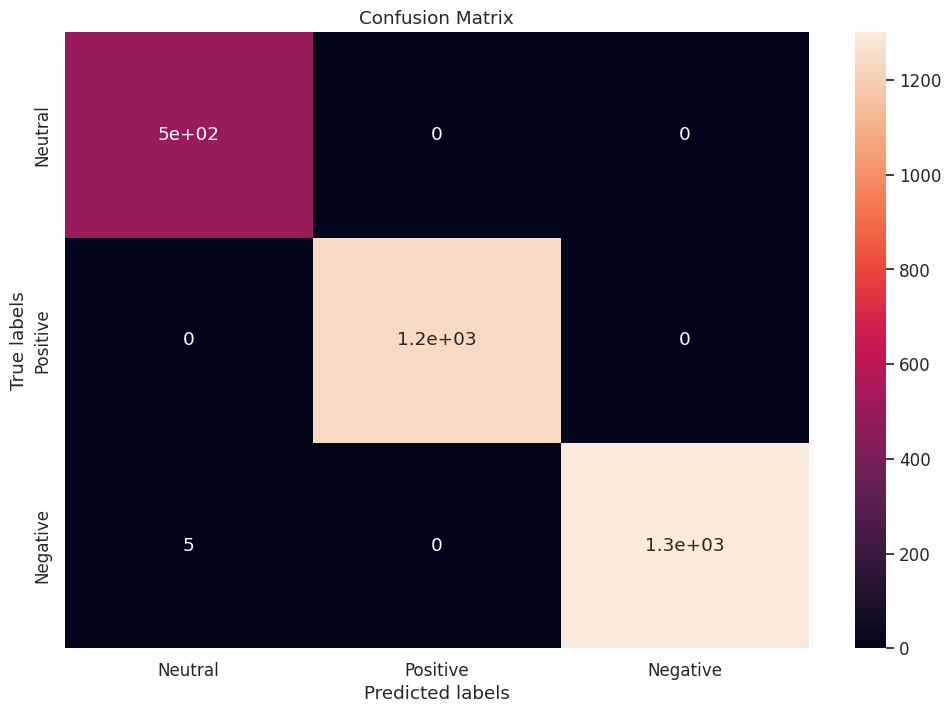

In [208]:
# Get the confusion matrix for both train and test. We are getting very low type and type 2 errors.

labels = ['Neutral', 'Positive','Negative']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [209]:
# Let's check the overall accuracy. Overall accuracy is very good.
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

y_pred = sgd_clf.predict(X_valid)

score =accuracy_score(y_valid,y_pred)
print('accuracy is', score)

accuracy is 0.6578947368421053


In [210]:
# F1 score for our classifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


y_pred =  sgd_clf.predict(X_valid)
print(f1_score(y_valid,y_pred, average="macro"))

0.6096173869149658


In [211]:
#score is mean accuracy
scikit_score = sgd_clf.score(X_valid,y_valid)
print('scikit score:', scikit_score)

scikit score: 0.6578947368421053


In [212]:
# Recall score for our winner model
recall_score(y_valid, y_pred, average='macro')

0.6082724122882209

In [213]:
# Classification Report for our stochastic gradient descent algorithm
classification_report(y_valid,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.44      0.41      0.43       124\n           1       0.69      0.73      0.71       309\n           2       0.70      0.68      0.69       327\n\n    accuracy                           0.66       760\n   macro avg       0.61      0.61      0.61       760\nweighted avg       0.66      0.66      0.66       760\n'

In [214]:
# Very low type 1 and type 2 error
confusion_matrix(y_valid,y_pred)

array([[ 51,  33,  40],
       [ 29, 227,  53],
       [ 35,  70, 222]])

# EVALUATION OF ALL THREECLASS CLASSIFICATION MODELS

**All the model test accuracy by descending order**

In [215]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression',
              'Random Forest', 'Naive Bayes',
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy,
              rf_accuracy, NB_accuracy,
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

Model  Test accuracy
1         Logistic Regression       0.678947
5                     XGBoost       0.673684
6                    CatBoost       0.663158
4  Stochastic Gradient Decent       0.657895
2               Random Forest       0.656579
0     Support Vector Machines       0.636842
3                 Naive Bayes       0.622368

# **THANKS YOU. WHAT'S YOUR SENTIMENT FOR THIS PROJECT? FEELING HAPPY OR NOT??**

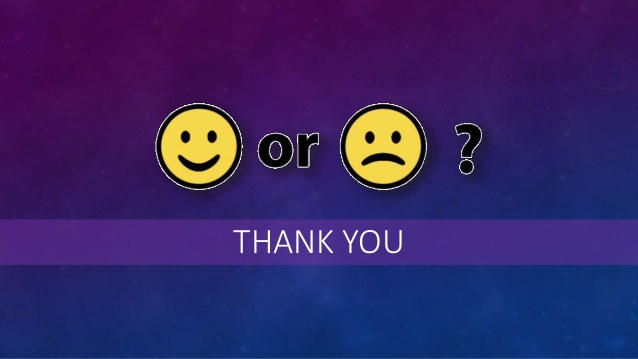